# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

It seems our Smartcab isn't really so smart at the moment. It's stays in the same position throughout the simulation, so the Smartcab's state never gets updated and it takes no action. In the environment, we see a bunch of other cars in the traffic lanes and traffic lights controlling the flow of the cars through each intersection. Our smartcab stationed in front of a traffic light sees rewards/punishments based on the traffic light color and occurence of incoming traffic:

- Red: Some reward for idling at a red light.
- Green w/ incoming traffic: Minor reward for staying safe and avoiding a possible collision.
- Green w/no incoming traffic: Some punishment for not progressing towards the goal.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()'`* function consider the North-South or East-West direction first?*

**Answer:**

Flags in `agent.py`:
- `num_dummies`: the discrete number of dummy agents in the environment, default is 100
- `alpha`: the continuous value for the learning rate for the driving agent, default is 0.5
- `enforce_deadline`: a flag set to True to enforce a deadline metric

In `environment.py`, the function `act()` is called to consider an action and perform it if it's legal.

In `simulator.py`, the function `render_text()` is the non-GUI render display of the simulation. The function `render()` is a GUI render display of the simulation.

In `planner.py`, the `next_waypoint()` function calculates the difference from the current position and the goal, and considers *East-West* direction before considering *North-South* in determining which action to take.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


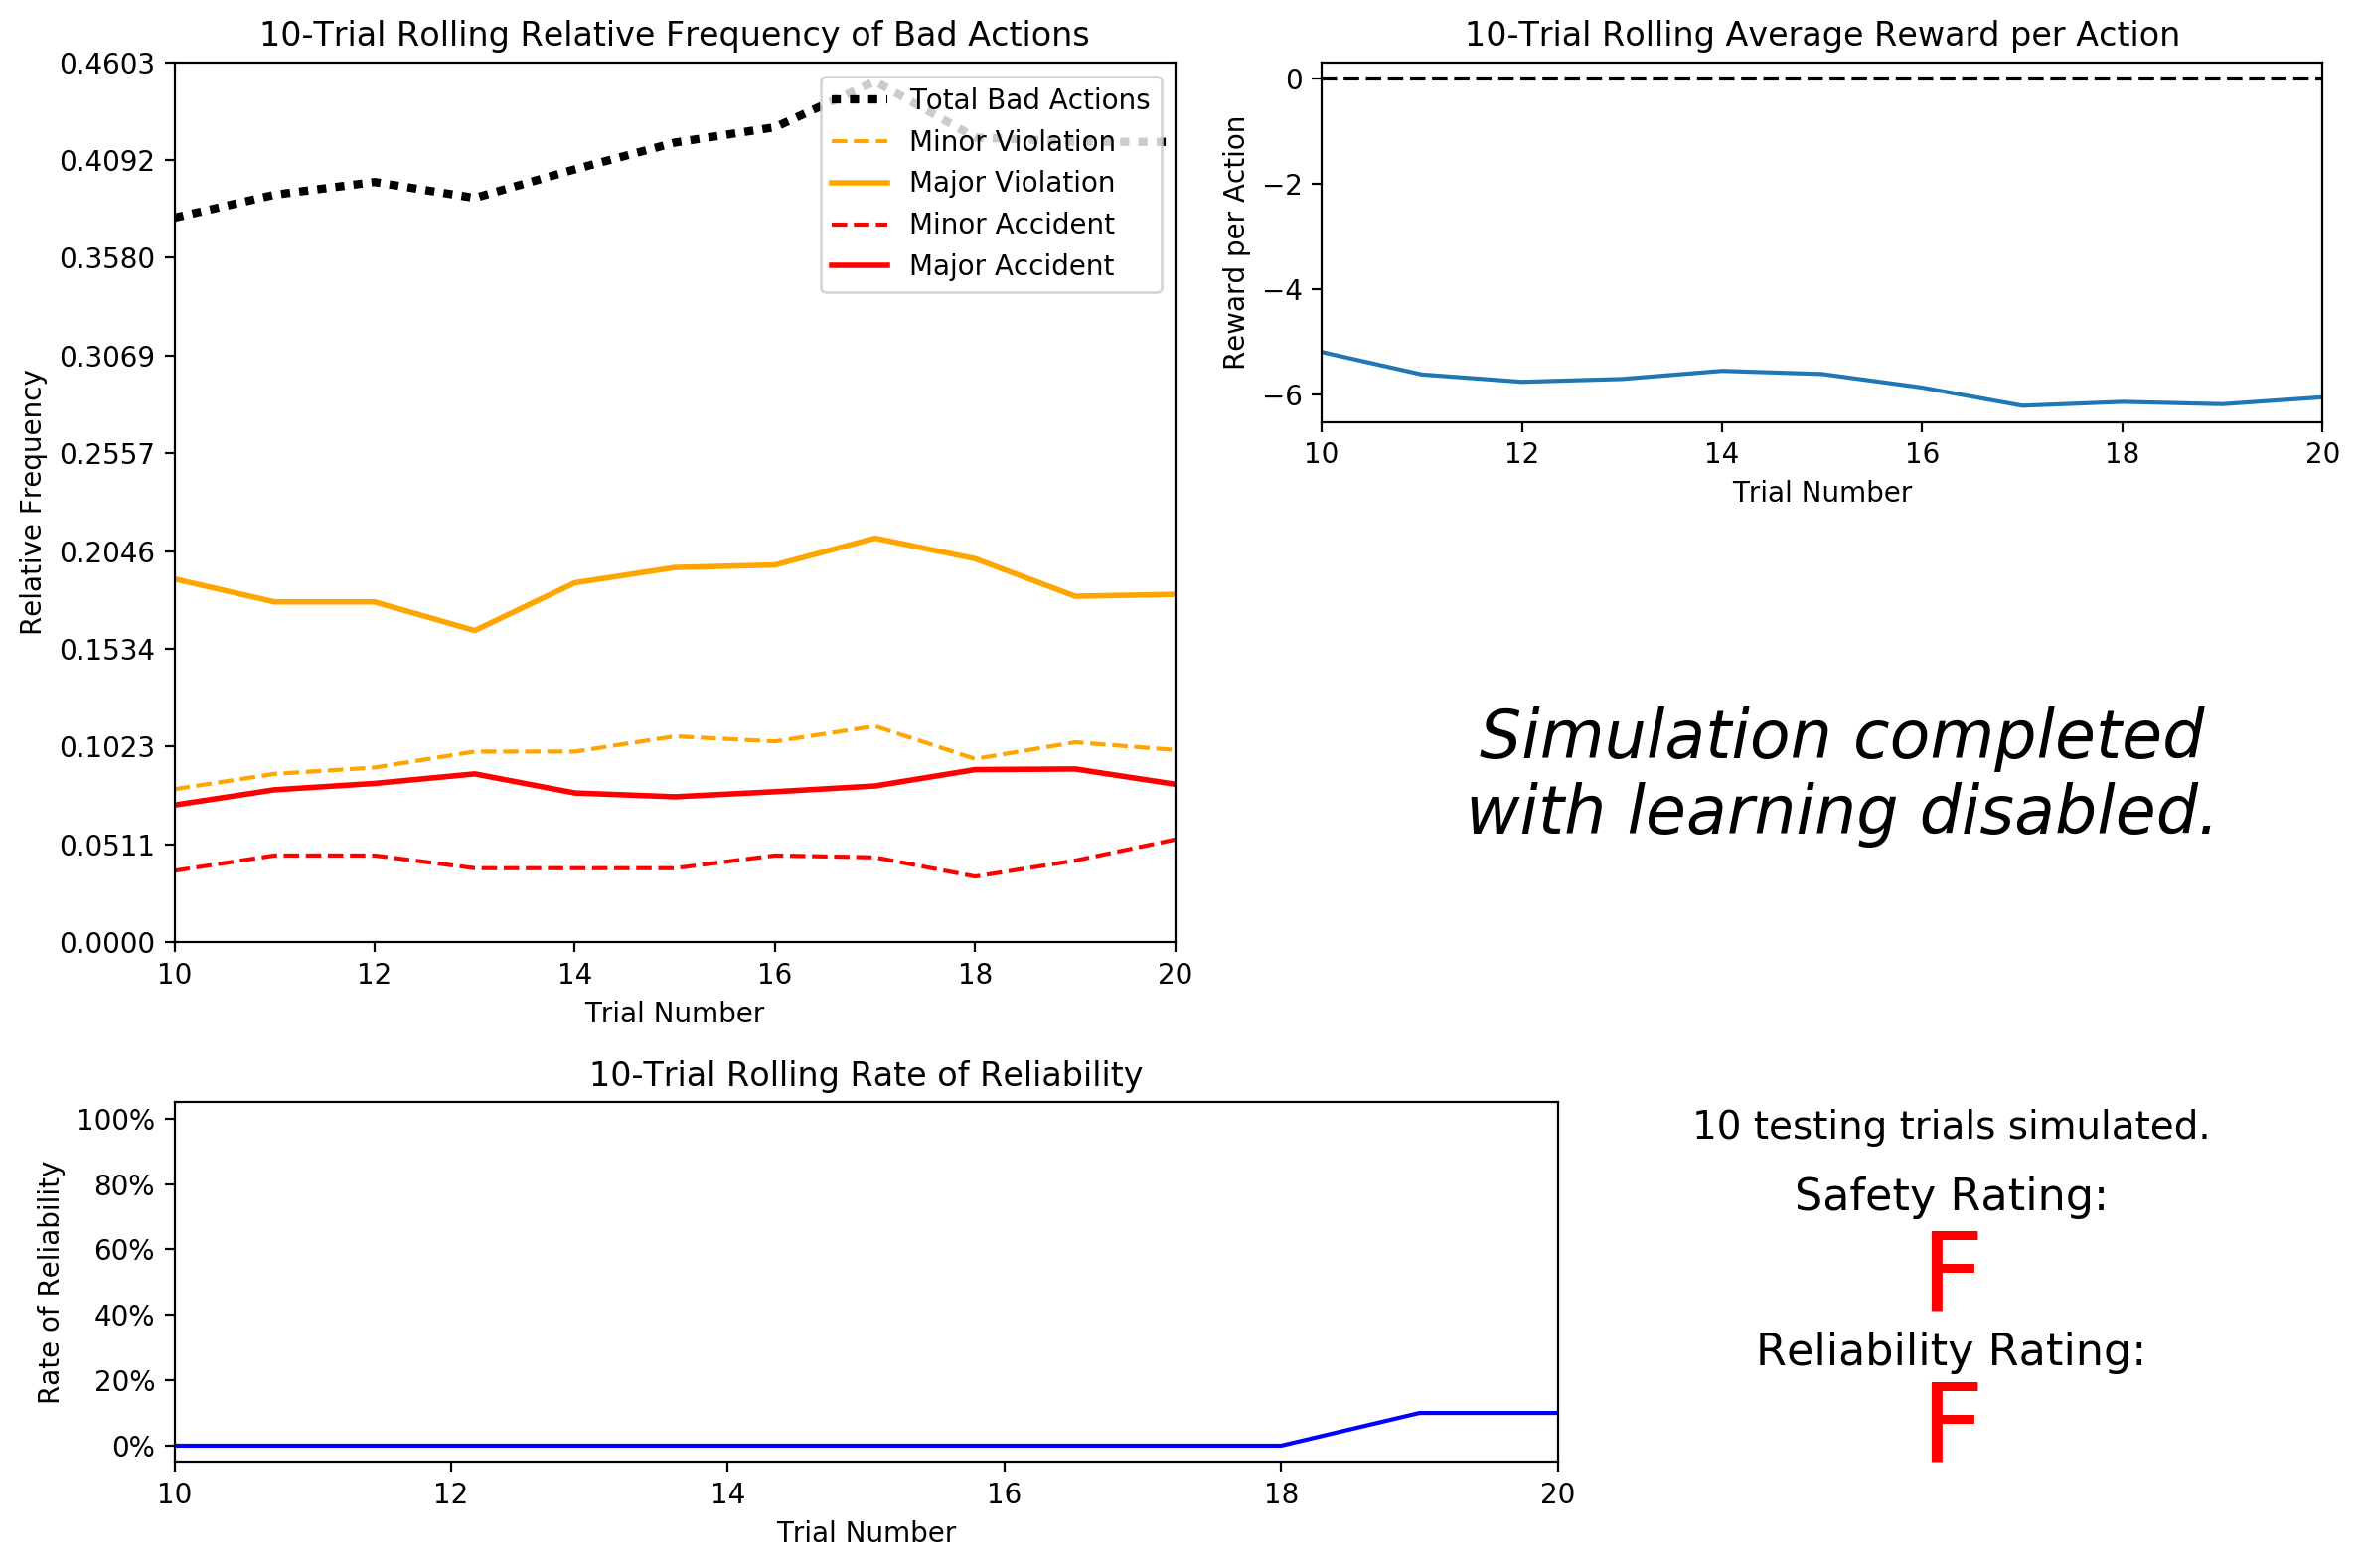

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The driving agent is terrible at making decisions, making bad decisions about 41% of the time and getting into accidents about 8% of the time.

Since the agent is always randomly performing actions and the agent not learning anything, the rate of reliability shouldn't really improve as the number of trials increases. However, it still makes to evaluate in a *Monte Carlo* sense to estimate the true probability of reaching the destination in time by sampling over a number of trials and averaging it.

The agent receives a scalar reward for performing actions that gets it to the destination reliability and safely. On average, it's receiving a negative rewards for each action, indicating that these random actions are usually hurting it's performance towards getting to the goal in time without traffic violations.

Increasing the number of trials slightly increases the percentage of bad actions, but it's not substantial enough to infer anything.

This Smartcab would be consider incredibly unsafe and unreliable for passengers. No one without a death wish would attempt a ride that would almost never get to it's destination in time while getting into accidents about 8% of the time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The `input light` is the most relevant feature, as it's used for determining if it's **safe** to go in any direction when *green*, if it's **safe** to conditionally take an action on *red*, and if it's more **efficient** to wait for a *green* light to go in the `waypoint` direction on *green* or take a *right* on the *red* light when it's safe. The `waypoint` feature is also highly relevant when combined with another feature for learning **safe** and **efficient** routes.

The following features aren't relevant for learning <u>both</u> **safety** and **efficiency**, but may be useful for one or the other:

- Two of the `inputs` are relevant for **safety**:
  - `left`: for determining if it's safe to make a *right* on *red* light when the `left` car tries to move *forward*
  - `oncoming`: for determining if it's safe to make a *left* on *green* when the `oncoming` car tries to move *forward* or if it's safe to make a *right* on any light when the `oncoming` car tries to make a *left* turn.

- The `deadline` is relevant for learning how to take **efficient** paths:
 - Including it lets us try to violate some traffic rules in order to meet the time constraints. But since the deadline is a continuous variable from 0 to 5 time steps per intersection away depending on what the environment initializes our positions to, including it would increase the state space significantly.
 - I've chosen to not include the `deadline` feature in the model due to this fact. We'd wouldn't be able to trade some safety for more efficient routes, but we'd ensure we wouldn't have to incur such a significant time cost.

Finally, the `input right` isn't too appropriate for modeling the Smartcab in the environment for :
- It isn't really useful for anything from the standpoint of the driving agent. There aren't any U-turns in this world that we'd need to keep an eye out for when making a *right* turn on *red*.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Using the features (`'waypoint'`, `'light'`) to model the state of the Smartcab, the size of the state space would be 3 ``*`` 2 = **6** states. I think it's still unreasonable for our driving agent to learn a good policy for each possible state no matter how many training trials because it dismisses incoming traffic as a safety hazard.

Since we're heavily penalized for any accidents, it's more reasonable to include the intended directions of travel for the `left` and `oncoming` vehicles to avoid accidents, despite the time cost that training & testing the model would incur.

Fortunately, we can compress the state space of these vehicles:
- a `forward` boolean for `left`, since we only care it's trying to make a *left* when we're trying to make a *right* on *red*.
- a `('forward','left','neither')` tuple for `oncoming`, combining `'right'` and `None` into `'neither'` (we have right of way when we try to make a *left* on *green* and the `oncoming` vehicle is trying to make a *right*)

The size of the state space for (`'waypoint'`, `'light'`, `'left'`, `'oncoming'`) would then be 3 ``*`` 2 ``*`` 2 ``*`` 3 = **36** states

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interactive update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

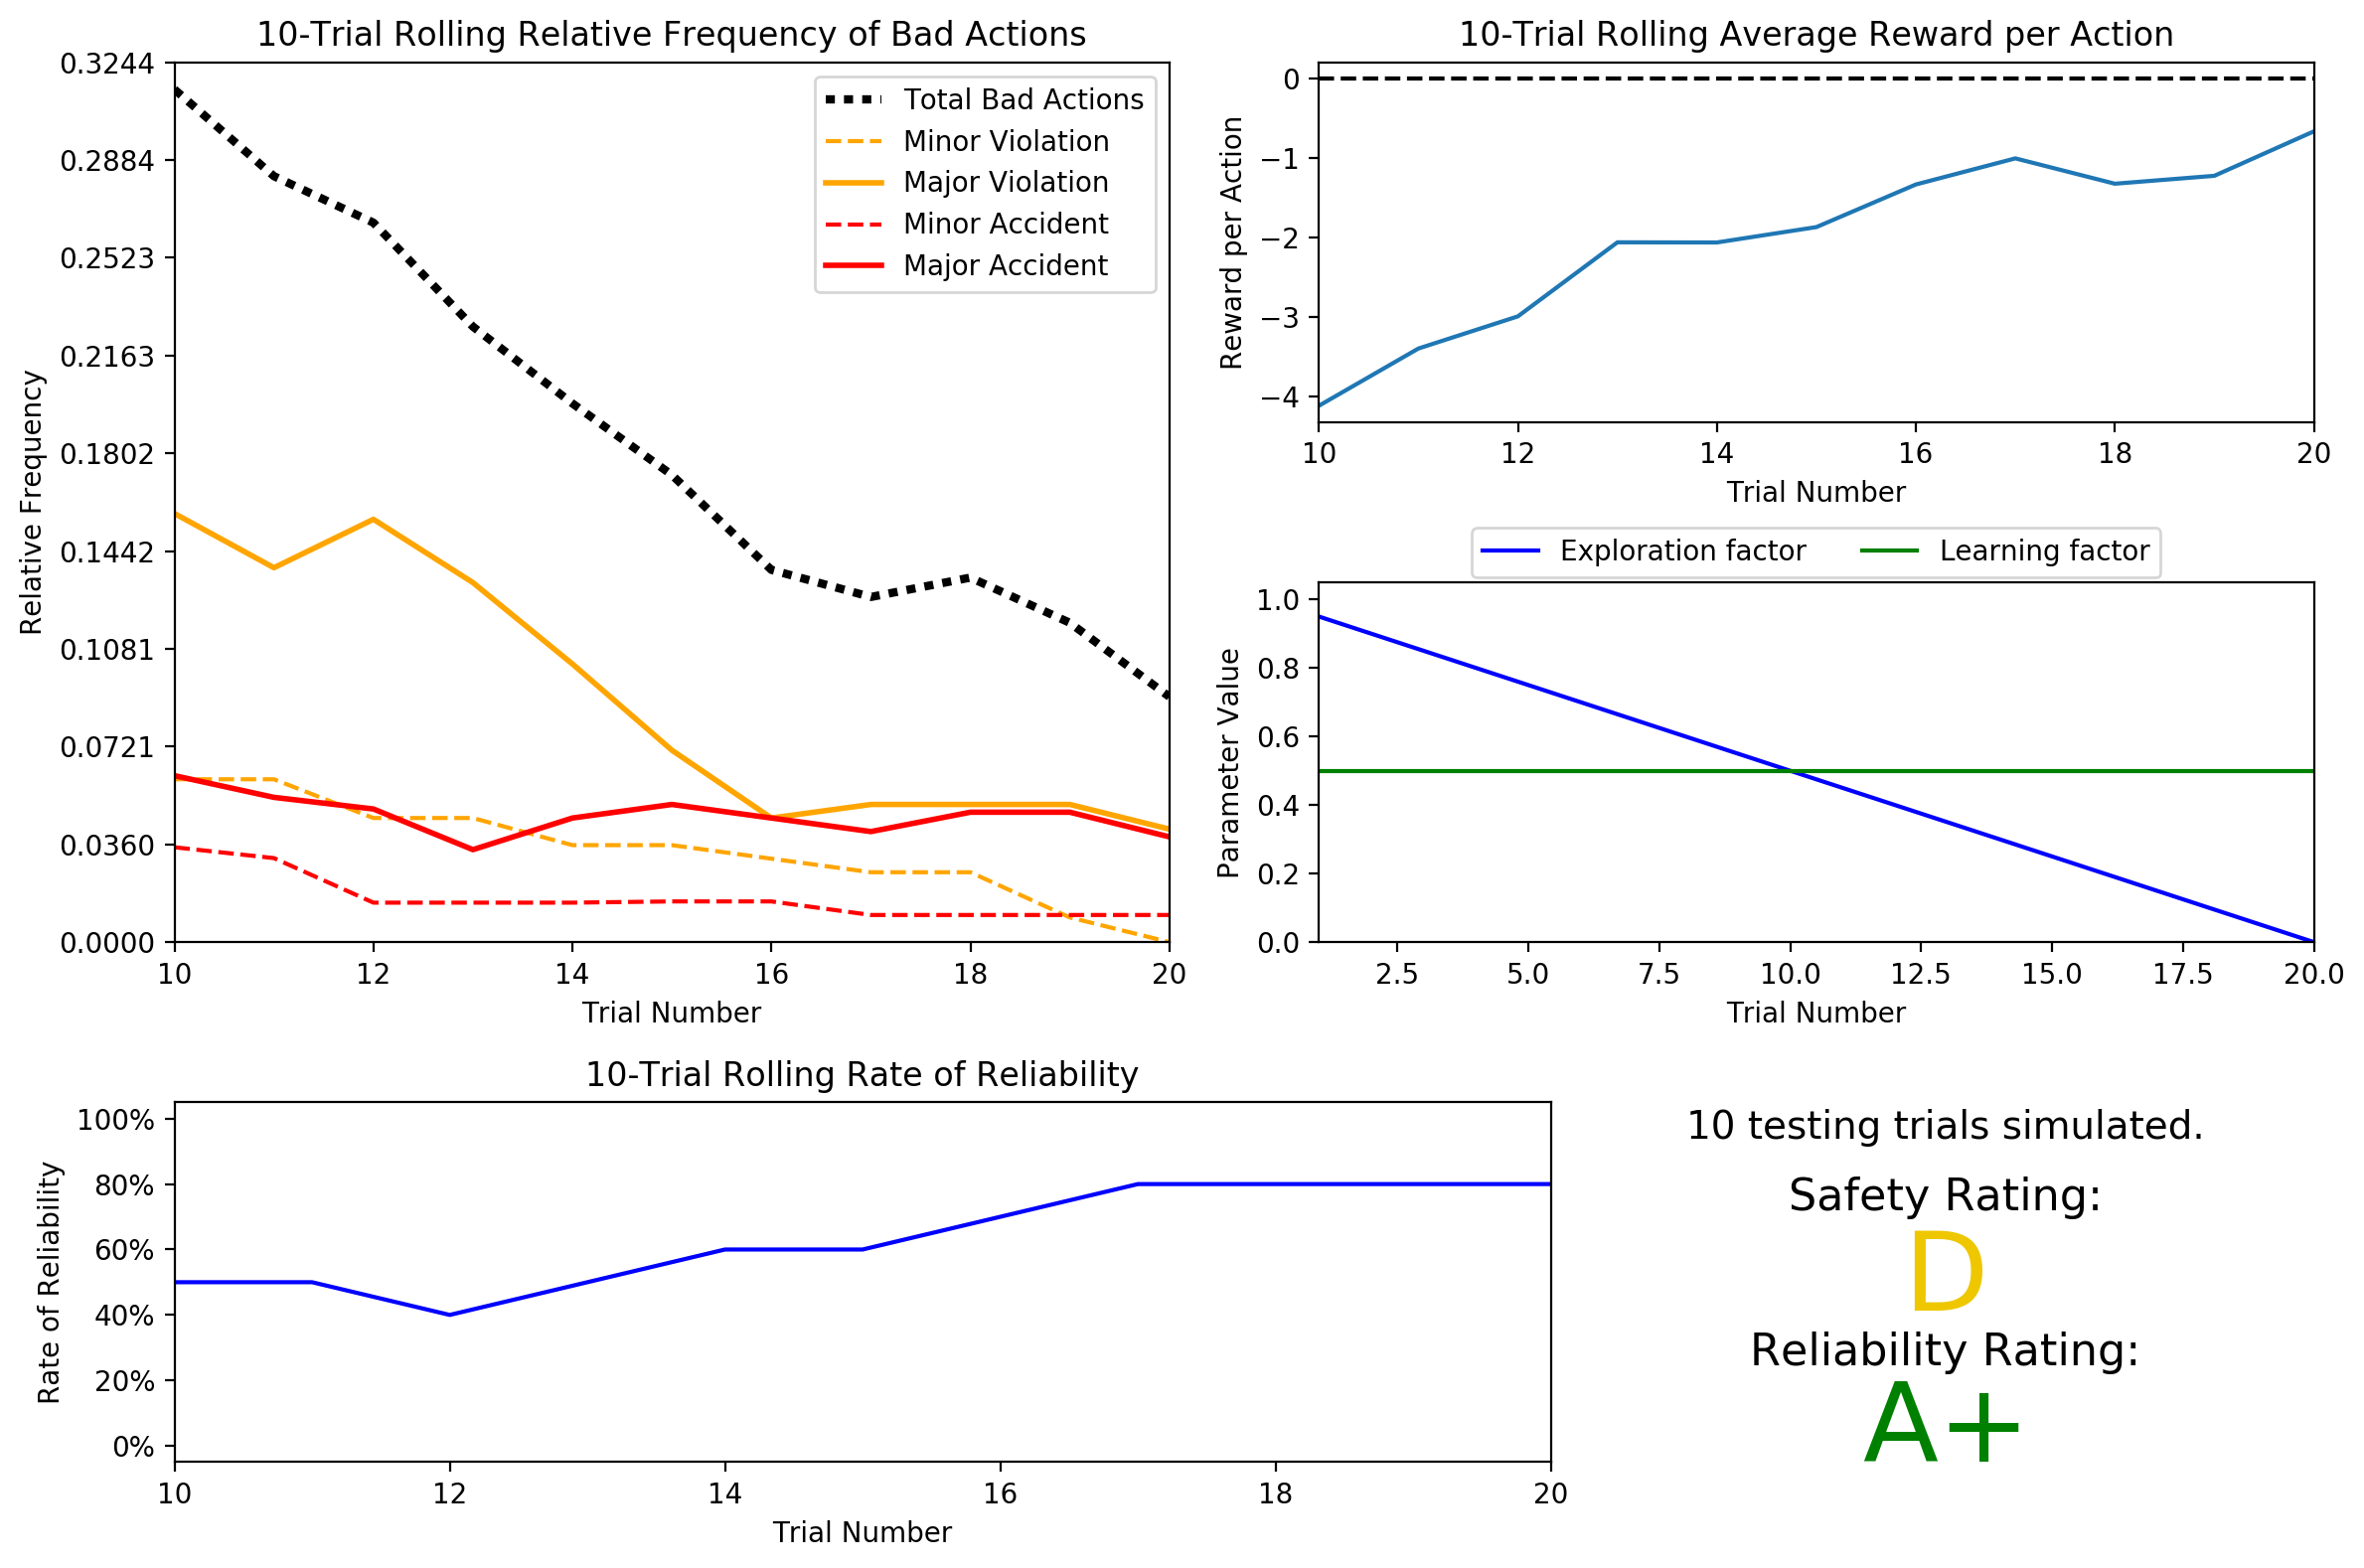

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The relative frequency of accidents on the linear q-learning simulation stays pretty flat and the reward per action is always negative. This is pretty consistent with the non-learning simulation which has a pretty flat relative frequency of accidents and negative rewards per action throughout each trial.

The driving agent took 20 trials to completely train before testing, which makes sense given our epsilon decay rate was 0.05, our default exploration was 1, and our default epsilon tolerance was 0.05.
$$ 0.05 = 1 - 0.05{t},\hspace{10px}\textrm{thus }{t} = 19 + \textrm{(trial 0)} = 20\textrm{ trials} $$
This is well reflected in the the parameters panel where we see a slope of -0.05 for the exploration factor from trial 0 to 20 and a constant learning factor of 0.5 as set by our default learning rate.

As the training trials increased, the frequency of bad actions decreased and the average reward increased, showing a substantial improvement over the non-learning simulation. In addition, it's getting to it's destination on time more reliably, reaching ~80% by the 20th trial in the 10-trial rolling rate of reliability compared to ~15% with the non-learning simulation. Overall it's learning to take safer and faster routes.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning parameters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

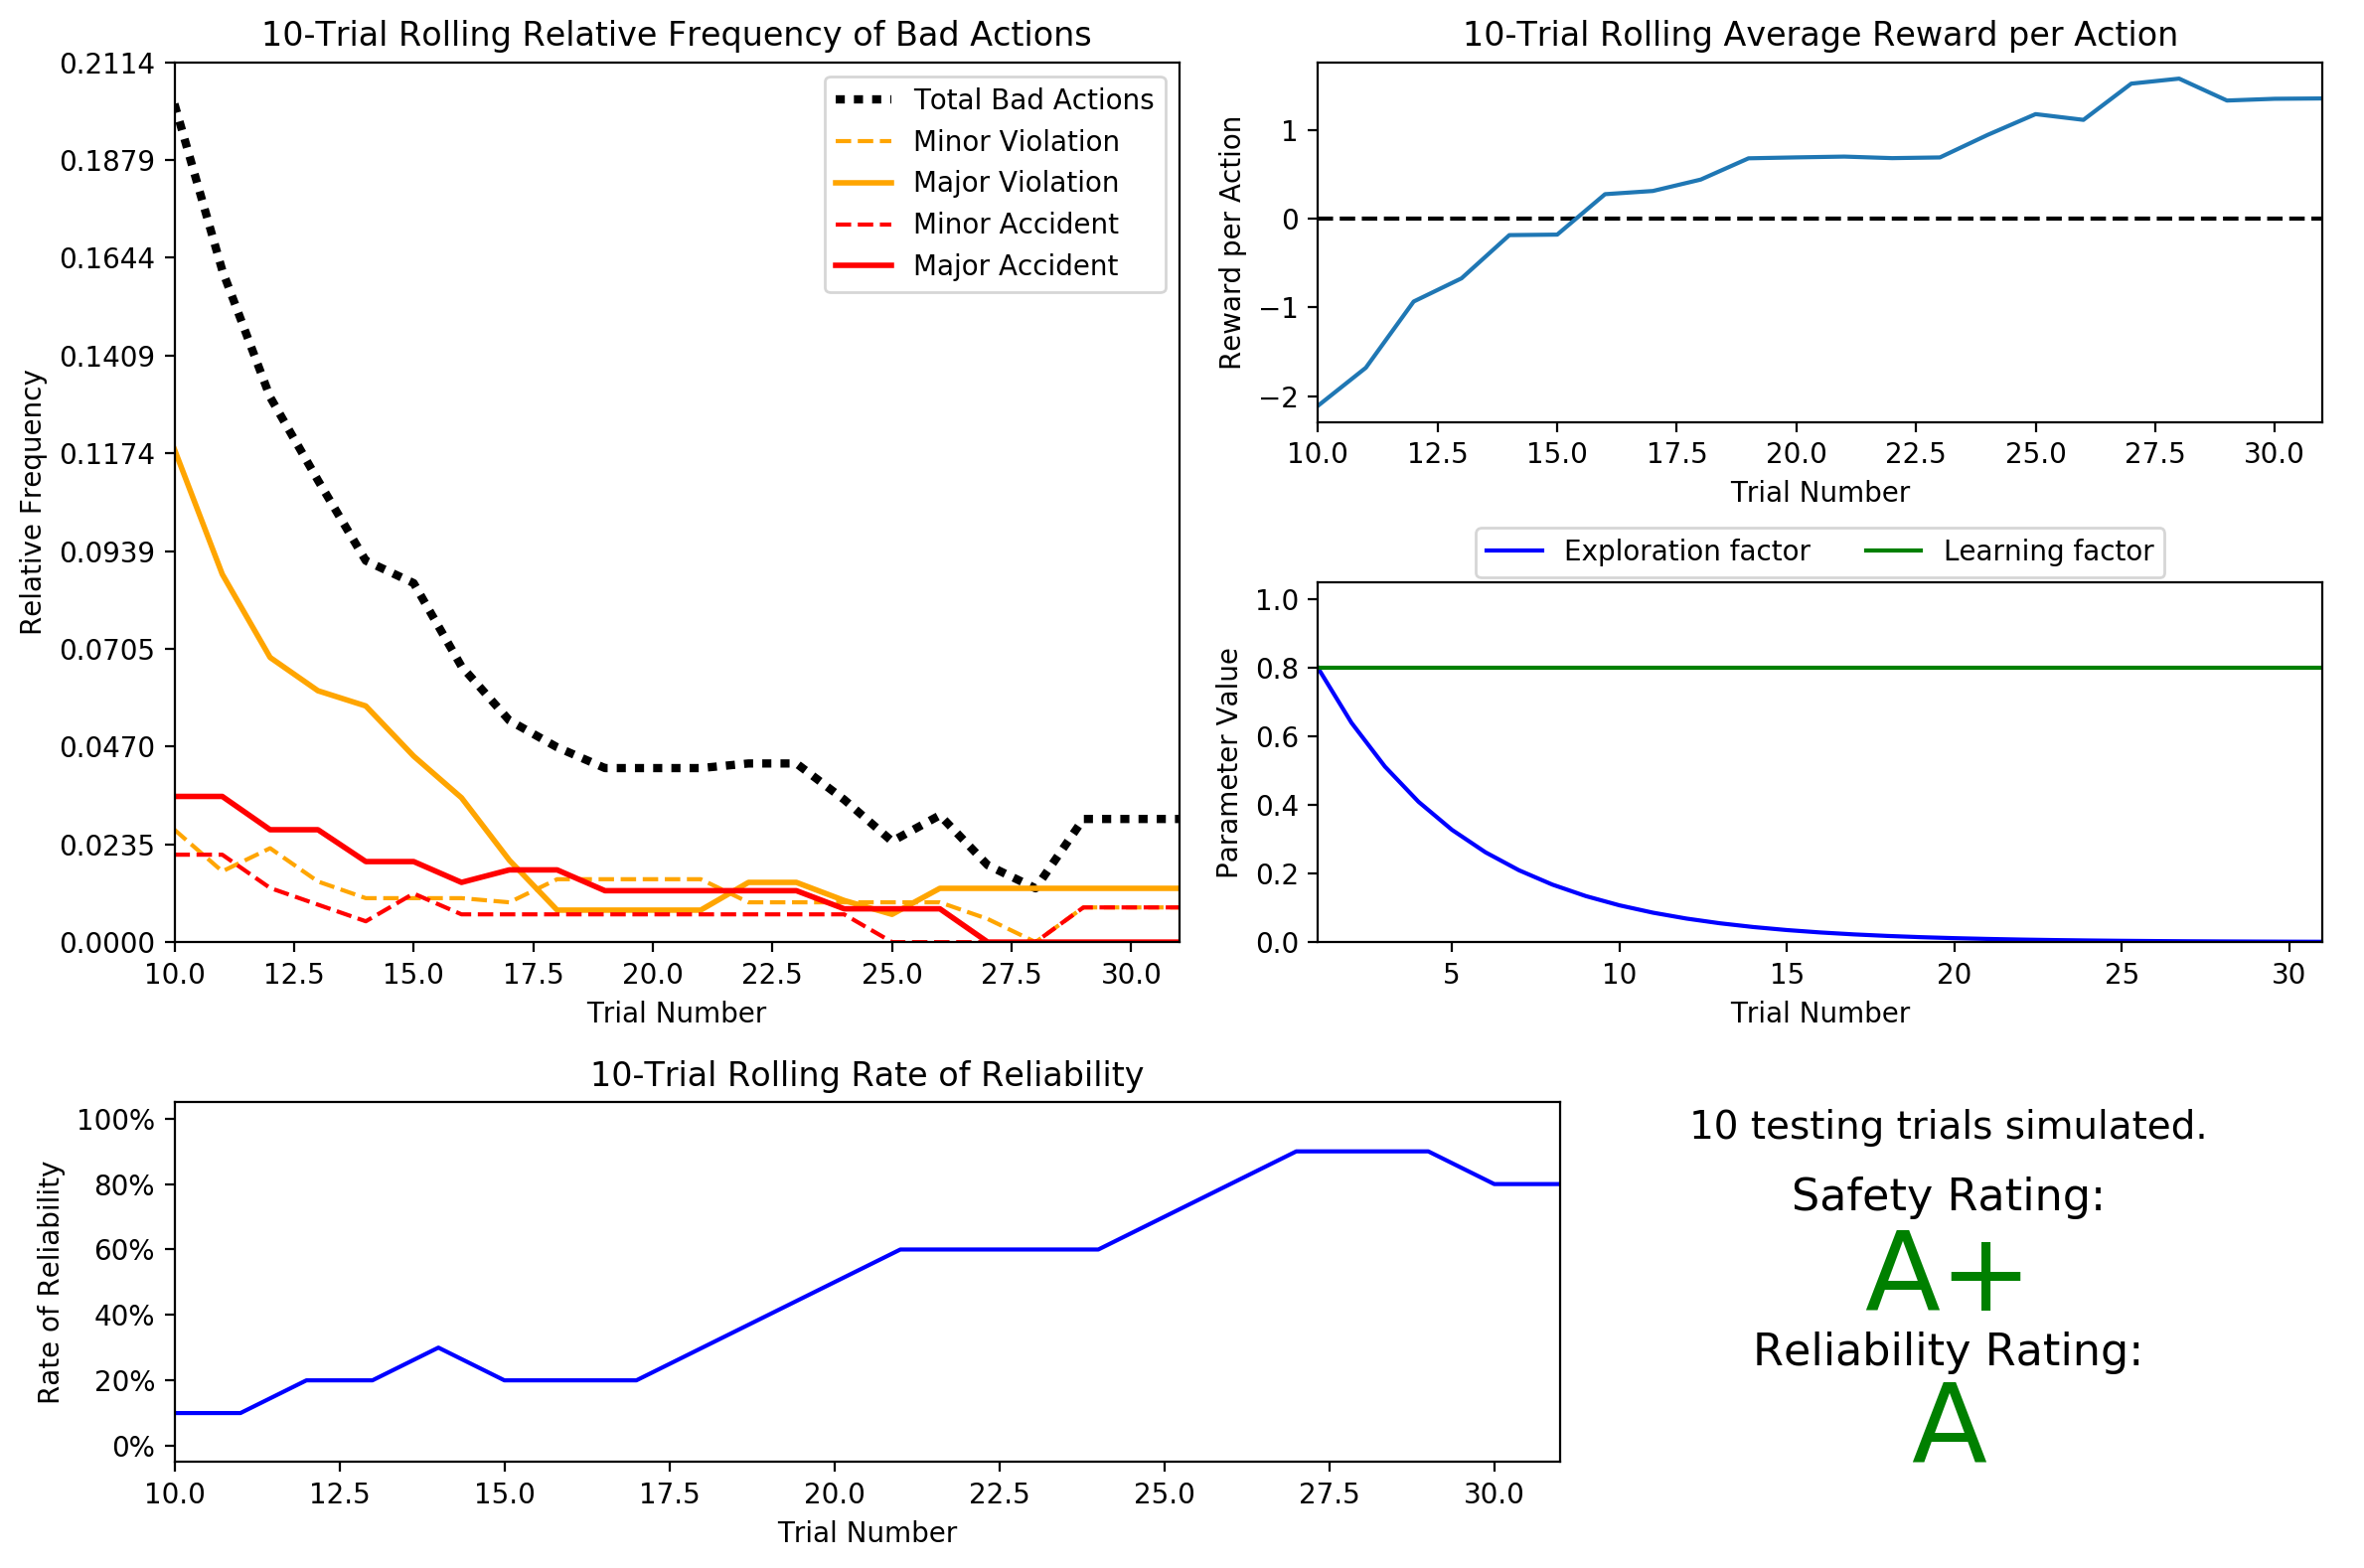

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before beginning testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I used a simple exponential decaying function for epsilon: $ \epsilon = a^t, \textrm{for } 0 < a < 1 $

This took approximately 31 trials to before testing since with a learning rate $\alpha$ of 0.8 and a $\epsilon$ tolerance 0.001, you get:
$ \epsilon = 0.8^{t} $ which results in $ {t} = \log _{0.8} .001 = 30.9566 $. I wanted to use a more aggressive learning rate but still run enough learning trials before testing, so I increased the learning rate a bit and reduced the $\epsilon$ tolerance significantly to account for the decay exponential function.

This exponentially decaying Q-learner made significant progress over the previous linearly decaying one. The overall frequency of bad actions reduced to about ~3% of the time versus ~9% of the time. The average reward per action approached ~1.3 compared to ~-1 in the linearly decaying Q-learner. The rate of reliability approached ~80% similar to the linear Q-learner.

This results in a A+ safety and a A reliability rating, compared to the linear Q-learner's D safety and A+ reliability rating. The reliability remained relatively the same, but we see significant safety improvements. I'd say the Q-learner results show that the driving agent successfully learned an appropriate policy for this environment. I'm pretty satisfied with these ratings. 😄

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Using the state-space definition: (`'waypoint'`, `'light'`, `'left'`, `'oncoming'`)
I'd expect several key behaviors including:
- usually moving towards `waypoint` direction on green light unless you're trying to make a `left` when there's an `oncoming` vehicle driving `forward` or when you're trying to make a `right` when there's an `oncoming` vehicle trying to make a `left`.
 - In that case yield until there's no `oncoming` vehicle trying to drive `forward`
- usually stopping on a `red` light unless you're trying to make a `right`
 - In that case check for an `oncoming` vehicle turning `left` or an `left` vehicle driving `forward`. If so, yield until it's no longer the case.
 
From inspecting `'sim_imporved-learning.txt'`, we can pull all the state-action rewards and show how well it's following my expected policy behavior:
```
('forward', 'green', 'forward', 'neither')
 -- forward : 2.01
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'green', 'forward', 'left')
 -- forward : 2.27
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'green', '!forward', 'neither')
 -- forward : 2.50
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'green', '!forward', 'left')
 -- forward : 2.12
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'green', '!forward', 'forward')
 -- forward : 1.32
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

```
The policy is to go on green when you're trying to go forward. Totally fine.

```
('right', 'green', 'forward', 'neither')
 -- forward : -0.36
 -- None : -4.02
 -- right : 0.86
 -- left : 0.00

('right', 'green', '!forward', 'neither')
 -- forward : -0.10
 -- None : -3.03
 -- right : 2.11
 -- left : 0.00

('right', 'green', '!forward', 'forward')
 -- forward : -0.22
 -- None : -3.62
 -- right : 1.25
 -- left : 0.00
```
Likewise, it's totally for fine to take a right on green when the oncoming isn't turning left.

```
('right', 'green', '!forward', 'left')
 -- forward : 0.96
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('right', 'green', 'forward', 'left')
 -- forward : -0.12
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

```
The policy is rather unusual when you're trying to make a right on green and the oncoming vehicle tries to make a left. The policy decides encourages driving forward or not based on left vehicle intended direction, even though it's red for the left vehicle. Perhaps a lack of training examples.

```
('forward', 'red', 'forward', 'neither')
 -- forward : -30.74
 -- None : 2.02
 -- right : 0.00
 -- left : 0.00

('forward', 'red', 'forward', 'forward')
 -- forward : -29.49
 -- None : 1.54
 -- right : 0.00
 -- left : 0.00

('forward', 'red', '!forward', 'left')
 -- forward : -7.39
 -- None : 1.27
 -- right : 0.00
 -- left : 0.00

('forward', 'red', '!forward', 'neither')
 -- forward : -7.09
 -- None : 1.96
 -- right : 0.00
 -- left : 0.00

('forward', 'red', '!forward', 'forward')
 -- forward : -7.79
 -- None : 1.82
 -- right : 0.00
 -- left : 0.00
```
The policy is to stop on red when you're trying to go forward. Makes sense; it's pretty straightforward.

```
('left', 'red', 'forward', 'neither')
 -- forward : -29.36
 -- None : 1.85
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'forward', 'left')
 -- forward : -30.23
 -- None : 1.30
 -- right : 0.00
 -- left : 0.00

('left', 'red', '!forward', 'neither')
 -- forward : -8.03
 -- None : 0.77
 -- right : 0.00
 -- left : 0.00

('left', 'red', '!forward', 'left')
 -- forward : -6.94
 -- None : 2.14
 -- right : 0.00
 -- left : 0.00

('left', 'red', '!forward', 'forward')
 -- forward : -7.26
 -- None : 1.50
 -- right : 0.00
 -- left : 0.00
```
Likewise, the policy is to stop on red when you're trying to turn left. Let's not die.

```
('right', 'red', 'forward', 'neither')
 -- forward : -30.49
 -- None : 1.88
 -- right : 0.00
 -- left : 0.00
 
('right', 'red', 'forward', 'left')
 -- forward : -29.98
 -- None : 2.36
 -- right : 0.00
 -- left : 0.00

('right', 'red', 'forward', 'forward')
 -- forward : -30.32
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

```
When making a right on red and the left car is trying to drive forward, the policy is to yield. Makes sense. It seems like there wasn't an example where we were rewarded when the oncoming vehicle was also trying to move forward.

```
('right', 'red', '!forward', 'left')
 -- forward : -7.98
 -- None : 1.22
 -- right : 0.00
 -- left : 0.00
```
The policy is to yield for the oncoming vehicle when it's making a left and you're trying to make a right on red. Makes sense.

```
('left', 'green', '!forward', 'left')
 -- forward : -0.27
 -- None : -0.14
 -- right : -0.18
 -- left : 1.39

('left', 'green', 'forward', 'left')
 -- forward : -0.38
 -- None : 0.09
 -- right : 0.00
 -- left : 0.00

```
The policy when you're trying to make a left on green and the oncoming vehicle is trying to turn left depends on the left vehicle's intended direction, which really shouldn't matter since it's red for left.

As expected, it's fine to take a left when the the left vehicle isn't trying to drive forward. But when the left vehicle wants to drive forward on red, the policy is to yield. It's not weighted heavily to yield in this case, so perhaps we have a lack of training examples.

```
('right', 'green', 'forward', 'forward')
 -- forward : 0.04
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00
```
The policy is drive forward, which totally doesn't makes sense when you're trying to take a right. It's not weighted too heavily though, so it's likely that it hasn't been trained on enough examples of this.

```
('left', 'green', '!forward', 'neither')
 -- forward : -0.13
 -- None : -4.44
 -- right : 0.26
 -- left : -14.93

('left', 'green', 'forward', 'neither')
 -- forward : -0.09
 -- None : -3.06
 -- right : 0.59
 -- left : 0.00

('left', 'green', '!forward', 'forward')
 -- forward : 1.39
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('right', 'red', '!forward', 'neither')
 -- forward : -7.26
 -- None : 1.72
 -- right : 0.00
 -- left : 0.00

('right', 'red', '!forward', 'forward')
 -- forward : -30.51
 -- None : 1.69
 -- right : 0.00
 -- left : 0.00
```

In these states, the policy is making rather nonsensical decisions by not even moving in the direction of the waypoint. In the case where taking a left on green when the oncoming might be taking a right, we're heavily penalized even though we have the right of way. Even though we have the right of way, it does make sense to yield to avoid collisions with bad drivers, but it doesn't make sense to take a right.

One thing to note is that aside from that example, the weights on the waypoint direction are all zero, indicating that we simply haven't encountered any examples when we took the waypoint direction. So these anomalies are likely due to not following the policy, but still exploring the rewards for each of the state-action pairs. This can be mitigated by taking more time to train on the learned policy in these unfrequently seen situations by reducing the learning rate and reducing the $\epsilon$ threshold.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The use of future rewards aren't appropriate for this problem due to a few problems, two of which to note are:
- The agent doesn't factor in it's position relative to it's destination. The driving agent's inputs only focus on the immediate situation, none of which include positions, so it's unable to include it as part of it's state. Including it multiplies our state space by the number of cells in the grid (48), which results in 36 x 48 = 1728 states in our state space, which is way too large for our MDP to handle.
- The environment is always changing, so the future rewards are not fixed. The destination changes with every trial, so it's useless the make weight adjustments from backpropagation from every position that was once the destination. In addition, there are mulitple other agents that are making their own decisions and including them in your state space would make your MDP too large to handle realistically. 